# Lab 2

#### Joseph Bu

In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
from scipy.integrate import simps
from scipy.optimize import curve_fit
from scipy.stats import poisson
from scipy.stats import norm
from scipy.special import gammaln # x! = Gamma(x+1)
import pandas as pd
import math

plt.rcParams["figure.figsize"] = (15,10)

## Problem 1

Lets assume in 1 day, the average cosmic-ray background is X=7 and our average number of gamma-rays emitted by our source is Y=10

In [3]:
X=7
Y=10

The probability mass function for a poisson distribution is:

$ f(k) = exp(-\mu) \frac{\mu^k}{k!}, k \geq 0$

$\mu$ is our average event rate or averate rate of occurences.

So the probability that the cosmic-ray background would have given a measurement more than our signal from our source Y=10 is

In [4]:
prob = stats.poisson.sf(k=Y, mu=X, loc=0)
prob

0.09852079411091275

So the probability of obtaining a measurement of 15 or more from only the cosmic-ray background in 1 day is 9.8%.

In [12]:
x1 = np.arange(0, 100, 1)
P_background = stats.poisson.pmf(k=x1, mu=X, loc=0)

day1 = P_background
day2=  np.convolve(day1, day1)
day3 = np.convolve(day2, day1)
day4 = np.convolve(day3, day1)
day5 = np.convolve(day4, day1)

x2 = np.arange(0, len(day2), 1)
x3 = np.arange(0, len(day3), 1)
x4 = np.arange(0, len(day4), 1)
x5 = np.arange(0, len(day5), 1)

### A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

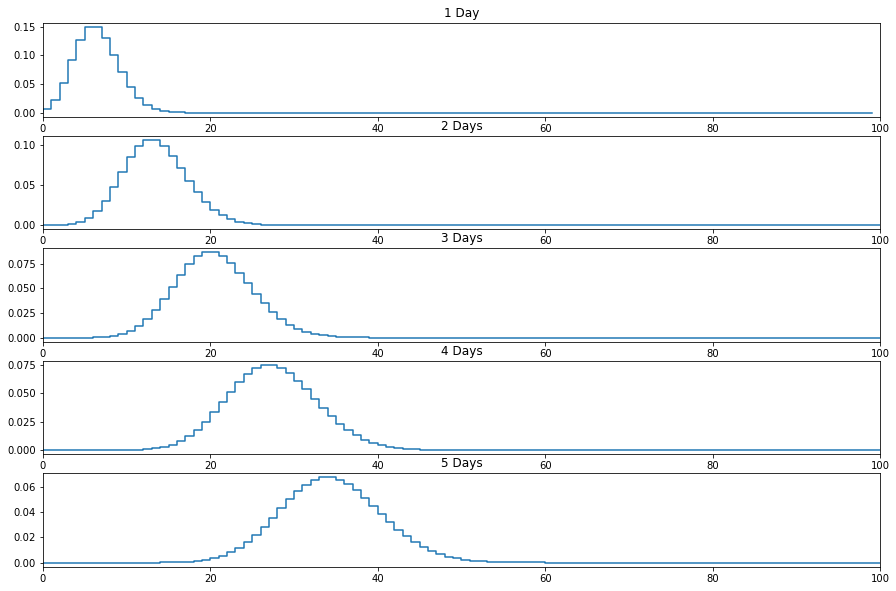

In [13]:
fig, ax = plt.subplots(5, 1)

ax[0].step(x1, day1)
ax[0].set_title('1 Day')
ax[0].set_xlim(0,100)

ax[1].step(x2, day2)
ax[1].set_title('2 Days')
ax[1].set_xlim(0,100)

ax[2].step(x3, day3)
ax[2].set_title('3 Days')
ax[2].set_xlim(0,100)

ax[3].step(x4, day4)
ax[3].set_title('4 Days')
ax[3].set_xlim(0,100)

ax[4].step(x5, day5)
ax[4].set_title('5 Days')
ax[4].set_xlim(0,100)
plt.show()

Here we can see how when we change the number of days we integrate over, our probability distribution changes

### B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

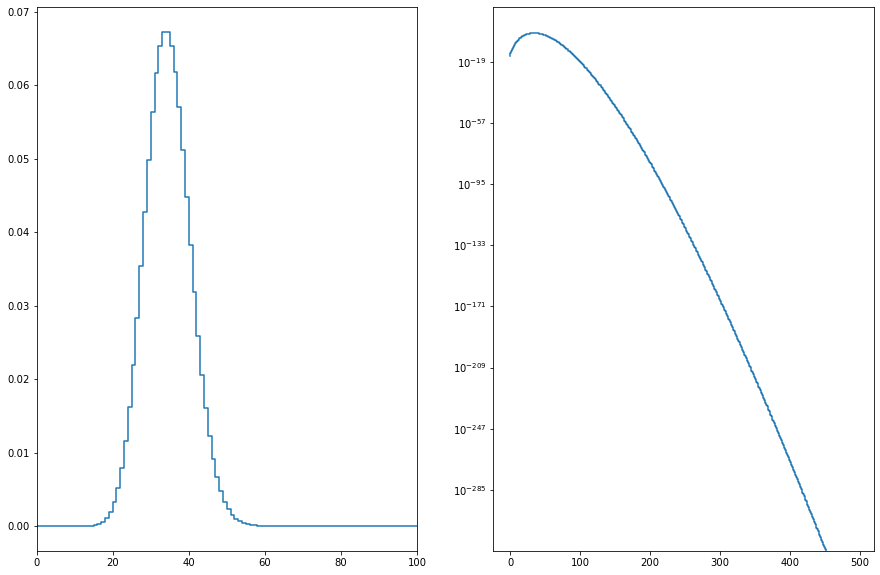

In [14]:
day5_mean = np.sum(x5@day5)
poisson = stats.poisson.pmf(x5, mu=day5_mean, loc=0)

fig, ax = plt.subplots(1,2)

ax[0].step(x5, poisson)
ax[0].set_xlim(0,100)

ax[1].set_yscale('log')
ax[1].step(x5, poisson)
plt.show()

As we can see this is still a Poisson distribution. We can see that the log plot of our summed over 5 days probability distribution has the characteristic of a Poisson Distribution.

### C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

In [25]:
day10 = day1
for i in range(9):
    day10 = np.convolve(day10, day1)
    
day15 = day1
for i in range(14):
    day15 = np.convolve(day15, day1)
    
day30 = day1
for i in range(29):
    day30 = np.convolve(day30, day1)
    
day80 = day1
for i in range(79):
    day80 = np.convolve(day80, day1)

In [26]:
x1_avg = x1/1
x2_avg = np.arange(0,len(day10), 1)/10
x3_avg = np.arange(0,len(day15), 1)/15
x4_avg = np.arange(0,len(day30), 1)/30
x5_avg = np.arange(0,len(day80), 1)/80

(0.0, 30.0)

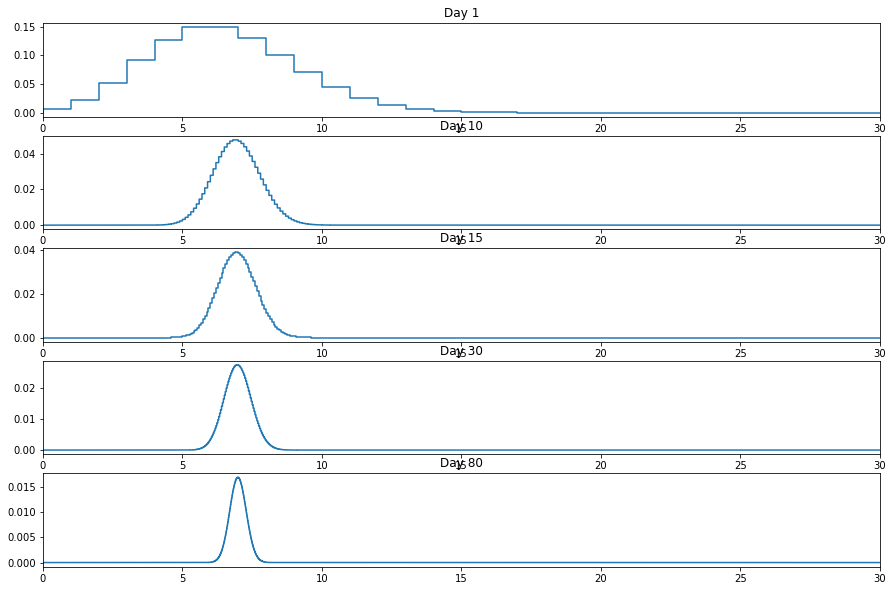

In [30]:
fig, ax = plt.subplots(5,1)

ax[0].step(x1_avg, day1)
ax[0].set_title('Day 1')
ax[0].set_xlim(0,30)

ax[1].step(x2_avg, day10)
ax[1].set_title('Day 10')
ax[1].set_xlim(0,30)

ax[2].step(x3_avg, day15)
ax[2].set_title('Day 15')
ax[2].set_xlim(0,30)

ax[3].step(x4_avg, day30)
ax[3].set_title('Day 30')
ax[3].set_xlim(0,30)

ax[4].step(x5_avg, day80)
ax[4].set_title('Day 80')
ax[4].set_xlim(0,30)

By averaging over more days, we see that the width of the plot decreases as the days increase. The shape of the graph also appears to be approaching a Guassian, which is consistent with the Central Limit Theoreom.

### D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]

In [63]:
day6 = np.convolve(day5, day1)
gamma_rays = (6*4.5)
cdf = 0
for i in range(int(gamma_rays + 1)):
    cdf += day6[i]
print('sigma:', np.abs(stats.norm.ppf(1-cdf)))

sigma: 2.361624460875804


So I chose N = 6 days,  with an average of the gamma-rays emitted being 4.5 (Y), there would've been 36 events seen. In order to get the six days. We integrate from zero to 36 in order to get the probability that the background gives us a signal less than our measured value. So our sigma value is 2.36.

## Problem 2

Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.

### A) Show how the distribution changes as you average over more observing intervals.

In [37]:
x_rayleigh = np.arange(0,50,0.5)
rayleigh = stats.rayleigh.pdf(x_rayleigh, scale = 4)

(0.0, 40.0)

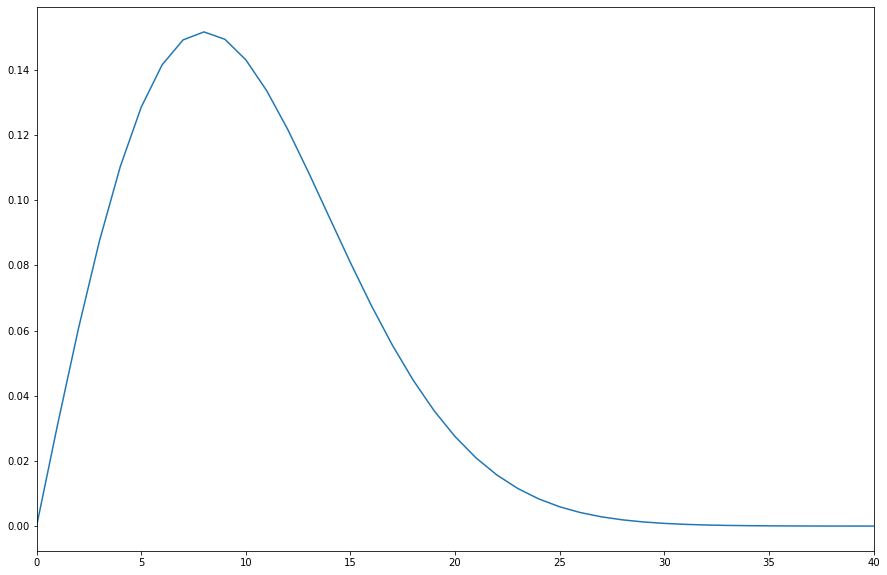

In [38]:
plt.plot(rayleigh)
plt.xlim(0,40)

In [46]:
day1_r = rayleigh

day10_r = day1_r
for i in range(9):
    day10_r = np.convolve(day10_r, day1_r)
    
day100_r = day1_r
for i in range(99):
    day100_r = np.convolve(day100_r, day1_r)
    
day200_r = day1_r
for i in range(199):
    day200_r = np.convolve(day200_r, day1_r)
    
day300_r = day1_r
for i in range(299):
    day300_r = np.convolve(day300_r, day1_r)

(8.5, 11.5)

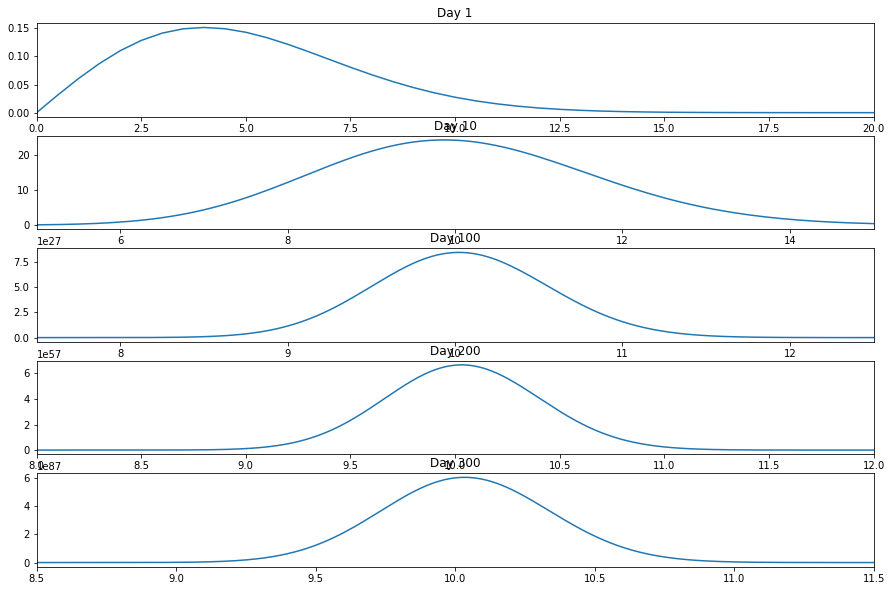

In [48]:
fig, ax = plt.subplots(5,1)

ax[0].plot(x_rayleigh, day1_r)
ax[0].set_title('Day 1')
ax[0].set_xlim(0,20)

ax[1].plot(np.arange(0,len(day10_r))/10, day10_r)
ax[1].set_title('Day 10')
ax[1].set_xlim(5,15)

ax[2].plot(np.arange(0,len(day100_r))/100, day100_r)
ax[2].set_title('Day 100')
ax[2].set_xlim(7.5,12.5)

ax[3].plot(np.arange(0,len(day200_r))/200, day200_r)
ax[3].set_title('Day 200')
ax[3].set_xlim(8,12)

ax[4].plot(np.arange(0,len(day300_r))/300, day300_r)
ax[4].set_title('Day 300')
ax[4].set_xlim(8.5,11.5)

### B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

So it seems like from the Rayleigh plots, that after 10 days, the distribution approaches Gaussian and doesn't really change no matter how much the days increase.

## Problem 3

The discovery of optical/infra-red counterparts of Neutron star mergers initially detected with gravity-waves is one of the great discoverys in the last few years (wikipedia, scientific paper), and has ushered in the age of "multi-messenger astrophysics." The science that can be done by matching a gravity-wave signal (directly measures the mass of the neutron stars and their distance) with the optical emisson (redshift, nuclear astrophysics of the resulting explosion) is staggering. Lots of science from how the heaviest elements are formed to constraints on Dark Energy.

We're going to explore one of the analysis questions that comes up when looking for the optical counterparts (a new optical source) of a gravity wave signal. For this problem let's assume that we are using an optical telescope with a thermal noise background from the CCD (dark current, particularly an issue with older CCDs and/or infra-red CCDs). After flat-fielding, the background appears as a zero-mean Gaussian with constant width over the image.

#### Version 1
You have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. But because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in.

#### A) From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

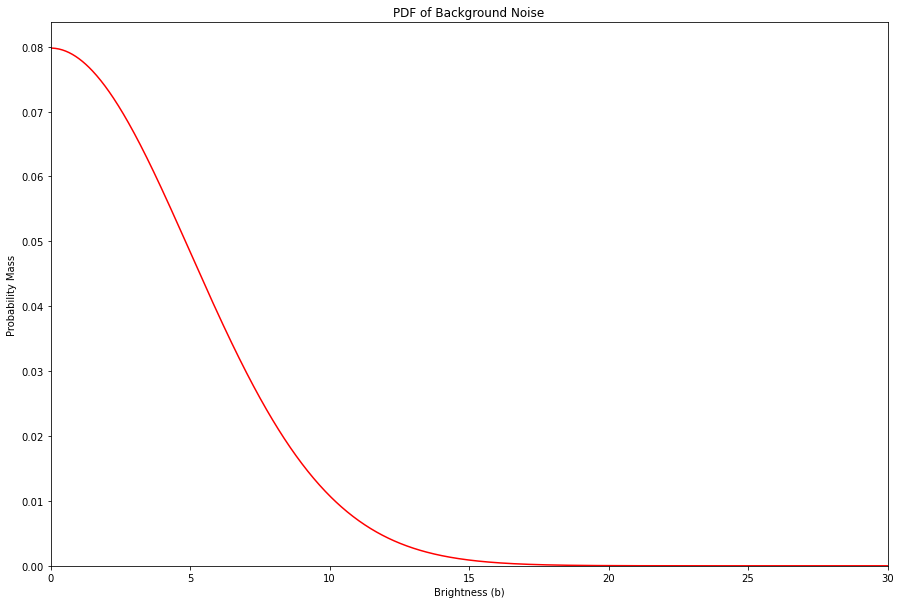

In [67]:
dist = stats.norm(scale=5)

fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 30, 1000)
plt.title("PDF of Background Noise")
plt.xlabel("Brightness (b)")
plt.ylabel("Probability Mass")
plt.plot(x, dist.pdf(x), label='1 pixel', color='r')
plt.xlim(0, 30)
plt.ylim(0, None);
plt.show()

In [64]:
width = 5
brightness = 30.4
prob = 1 - stats.norm.cdf(brightness, loc=0, scale=width)
ppf = np.abs(stats.norm.ppf(prob))
print('probability:', prob)
print('sigma:', ppf)

probability: 6.009127639927669e-10
sigma: 6.079999993103955


So our significance for this detection using a width of 5 on our background Gaussian and a signal strength of 30.4, we get 6.1 sigma. So yes we can claim a discovery.

#### Version 2
You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel.

#### B) If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

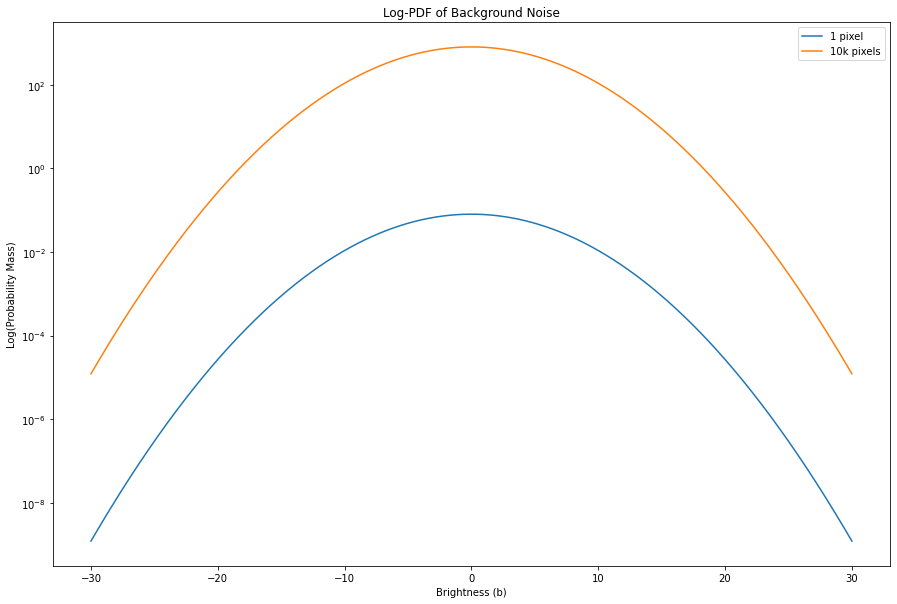

In [73]:
pdf = stats.norm.pdf(x, loc=0, scale=5)
new_bkgd = pdf * 10000

fig, ax = plt.subplots(1, 1)
x = np.linspace(-30, 30, 1000)
plt.title("Log-PDF of Background Noise")
plt.xlabel("Brightness (b)")
plt.ylabel("Log(Probability Mass)")
plt.plot(x, pdf, label='1 pixel')
plt.plot(x, new_bkgd, label='10k pixels')
plt.yscale('log')
plt.legend()
plt.show()

#### C) Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

In [75]:
scaled_prob = prob * 10000
scaled_ppf = np.abs(stats.norm.ppf(scaled_prob))
print('Probability:', str(scaled_prob))
print('Sigma:', str(scaled_ppf))

Probability: 6.009127639927669e-06
Sigma: 4.377256421339723


So the significance of our detection is 4.37 sigma